In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats, integrate
from PIL import Image

In [2]:
# 设置绘图风格
sns.set_style("ticks", rc={"xtick.direction": "in", "ytick.direction": "in", "ytick.major.pad": 1})
# 处理中文乱码
plt.rcParams['font.sans-serif'] = ['Arial']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'text.usetex': False})

# 设置百分比格式
def to_percent(y, position):
    return '{:.0f}%'.format(y)


In [3]:
def seq_info(seq_in):
    seq_len = []
    seq_GC_prec = []
    seq_GC_ratio = []
    seq_AT_ratio = []

    for i in range(len(seq_in)):
        i_len = len(seq_in[i])
        i_A_count = seq_in[i].count("A")
        i_T_count = seq_in[i].count("T")
        i_C_count = seq_in[i].count("C")
        i_G_count = seq_in[i].count("G")
        seq_len.append(i_len)

        if i_C_count != 0:
            seq_GC_ratio.append(i_G_count / i_C_count)
        else:
            seq_GC_ratio.append("na")
        if i_T_count != 0:
            seq_AT_ratio.append(i_A_count / i_T_count)
        else:
            seq_AT_ratio.append("na")
        seq_GC_prec.append((i_C_count + i_G_count) / i_len)

    return seq_len, seq_GC_prec, seq_GC_ratio, seq_AT_ratio


In [4]:
file_name = "all_utr5_dedup.csv"
file_path = "UTR_data/" + file_name
file_test = pd.read_csv(file_path, low_memory=False)
seq_df = pd.DataFrame(file_test)
print(seq_df.shape)


(323153, 4)


In [5]:
seq_df["spe"].value_counts()

chimp      68511
bonobo     58825
rhesus     56902
macaque    53638
human      51245
mouse      32678
virus       1354
Name: spe, dtype: int64

In [6]:
seq_df["len_log"] = np.log10(seq_df["len"])

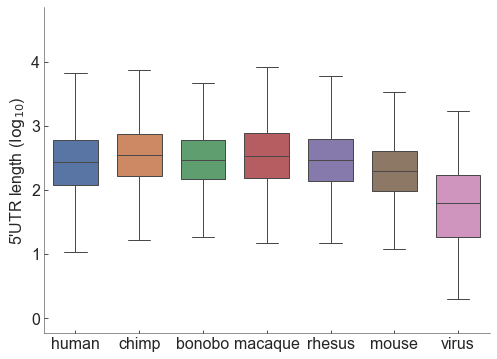

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the x-axis order
x_order = ['human', 'chimp', 'bonobo', 'macaque', 'rhesus', 'mouse', 'virus']

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='spe', y='len_log', data=seq_df, order=x_order, palette='deep', width=0.7, linewidth=1, fliersize=0)
# 去掉x轴名称
plt.xlabel('')
# 设置y轴标签，使用LaTeX语法将10设置为下标
plt.ylabel('5\'UTR length ($\log_{10}$)', fontsize=16)

# Set axis line width
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Hide right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置x轴和y轴标签的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Save the plot as a high-quality PNG image first
plt.savefig('result_1/boxplot_log_length.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_1/boxplot_log_length.png')
png_image.save('result_1/boxplot_log_length.tiff', dpi=(600, 600), compression='tiff_lzw')

# Show the plot
plt.show()


In [15]:
seq_len, seq_GC_prec, seq_GC_ratio, seq_AT_ratio = seq_info(seq_df["utr"])
seq_df["seq_GC_prec"] = seq_GC_prec
seq_df["seq_GC_prec"] *= 100

In [16]:
seq_df.head()

,id,spe,utr,len,len_log,seq_GC_prec
0,mm39_ncbiRefSeqCurated_NM_001159711.1,mouse,GTCGAGTCCGATGGTCTTCCTGGCGAGTTTAAAGTATCGGAGATAT...,52,1.716003,44.230769
1,mm39_ncbiRefSeqCurated_NM_175642.4,mouse,GGCTCTGGCCGCTGGATACCACCGCCCCCCCCCCTATTATTTTTTT...,261,2.416641,48.659004
2,mm39_ncbiRefSeqCurated_NM_008922.2,mouse,TTCCCGTTCCAAATGAACTCTCCCGCCACTGGGAGAGAGCGGCTGT...,180,2.255273,56.666667
3,mm39_ncbiRefSeqCurated_NM_001347056.1,mouse,GAGCCCCTGGCCTAGCAAGACTGCCTTGTACC,32,1.505150,62.500000
4,mm39_ncbiRefSeqCurated_NM_175370.5,mouse,GATAAAAGAAACAAACCATCCTGGGGCACAAGTCAGGCTCAGTCAA...,120,2.079181,51.666667


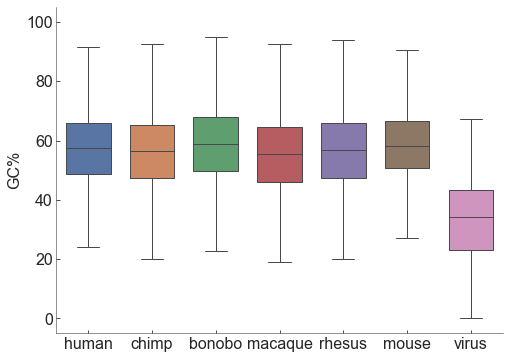

In [17]:
# Set the x-axis order
x_order = ['human', 'chimp', 'bonobo', 'macaque', 'rhesus', 'mouse', 'virus']

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='spe', y='seq_GC_prec', data=seq_df, order=x_order, palette='deep', width=0.7, linewidth=1, fliersize=0)
# 去掉x轴名称
plt.xlabel('')
# 设置y轴标签，使用LaTeX语法将10设置为下标
plt.ylabel('GC%', fontsize=16)

# Set axis line width
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Hide right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置x轴和y轴标签的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# # Save the plot as a high-quality image for scientific publications
# plt.savefig('result_1/boxplot_GC_precent.pdf', dpi=300, bbox_inches='tight')  # Save as PDF for vector graphics

# # Save the plot as an SVG file for high-quality vector graphics
# plt.savefig('result_1/boxplot_GC_precent.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
plt.savefig('result_1/boxplot_GC_precent.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_1/boxplot_GC_precent.png')
png_image.save('result_1/boxplot_GC_precent.tiff', dpi=(600, 600), compression='tiff_lzw')

# Show the plot
plt.show()


In [18]:
file_name = "info_UTR.txt"
# file_name = "all_utr5_dedup.csv"
file_path = "UTR_data/" + file_name
file_test = pd.read_csv(file_path, sep='\t', low_memory=False)
seq_df = pd.DataFrame(file_test)
print(seq_df.shape)

(238775, 55)


In [19]:
seq_df.columns
seq_df.head()

,seq_id,seq_range,seq_stand,seq_genus,seq_species,seq_type,seq_len,GC.,GC_ratio,AT_ratio,...,utr3_K-Box_pos,utr3_PAS_pos,utr3_SECIS1_pos,utr3_SECIS2_pos,utr3_TGE_pos,utr3_UNR_pos,utr5_uORF_pos,utr5_IRE_pos,utr5_TOP_pos,utr5_UNR_pos
0,NM_001276352.2,chr1:67092165-67093579,-,Homo,Homo sapiens,3UTR,1415.0,0.290459,0.826667,1.206593,...,NaN,"[1389,1415]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NM_001276351.2,chr1:67092165-67093004,-,Homo,Homo sapiens,3UTR,840.0,0.273810,0.932773,1.132867,...,NaN,"[814,840]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NR_075077.2,chr1:67092165-67134970,-,Homo,Homo sapiens,3UTR,2356.0,0.331070,0.930693,1.280753,...,NaN,"[2330,2356]",NaN,NaN,NaN,"[912,923]",NaN,NaN,NaN,NaN
3,NM_001005337.3,chr1:201328837-201332989,+,Homo,Homo sapiens,3UTR,2948.0,0.533921,1.082011,0.940678,...,"[255,260],[1290,1295],[2879,2884]","[2924,2948]",NaN,NaN,NaN,"[1004,1015],[2425,2436]",NaN,NaN,NaN,NaN
4,NM_000299.4,chr1:201328837-201332989,+,Homo,Homo sapiens,3UTR,2948.0,0.533921,1.082011,0.940678,...,"[255,260],[1290,1295],[2879,2884]","[2924,2948]",NaN,NaN,NaN,"[1004,1015],[2425,2436]",NaN,NaN,NaN,NaN


In [20]:
# 使用loc语法选择seq_type列为5UTR的行
utr5_df = seq_df.loc[seq_df['seq_type'] == '5UTR']
utr5_df = utr5_df.loc[utr5_df['seq_genus'].isin(['Homo', 'Mus'])]
utr5_df.shape
utr5_df.columns
# 获取seq_genus列的不同取值
unique_seq_genus = utr5_df['seq_genus'].unique()
print(unique_seq_genus)
utr5_df.columns


['Homo' 'Mus']


Index(['seq_id', 'seq_range', 'seq_stand', 'seq_genus', 'seq_species',
       'seq_type', 'seq_len', 'GC.', 'GC_ratio', 'AT_ratio', 'seq_fold_energy',
       'kmer_1', 'kmer_2', 'kmer_3', 'kmer_4', 'kmer_5', 'kmer_6', 'top_kmer3',
       'mfe_pre1000', 'utr3_ARE2', 'utr3_Brd-box', 'utr3_CPE', 'utr3_G3A',
       'utr3_GLUT1', 'utr3_GY-box', 'utr3_INS_SCE', 'utr3_IRE', 'utr3_K-Box',
       'utr3_PAS', 'utr3_SECIS1', 'utr3_SECIS2', 'utr3_TGE', 'utr3_UNR',
       'utr5_uORF', 'utr5_IRE', 'utr5_TOP', 'utr5_UNR', 'utr3_ARE2_pos',
       'utr3_Brd-box_pos', 'utr3_CPE_pos', 'utr3_G3A_pos', 'utr3_GLUT1_pos',
       'utr3_GY-box_pos', 'utr3_INS_SCE_pos', 'utr3_IRE_pos', 'utr3_K-Box_pos',
       'utr3_PAS_pos', 'utr3_SECIS1_pos', 'utr3_SECIS2_pos', 'utr3_TGE_pos',
       'utr3_UNR_pos', 'utr5_uORF_pos', 'utr5_IRE_pos', 'utr5_TOP_pos',
       'utr5_UNR_pos'],
      dtype='object')

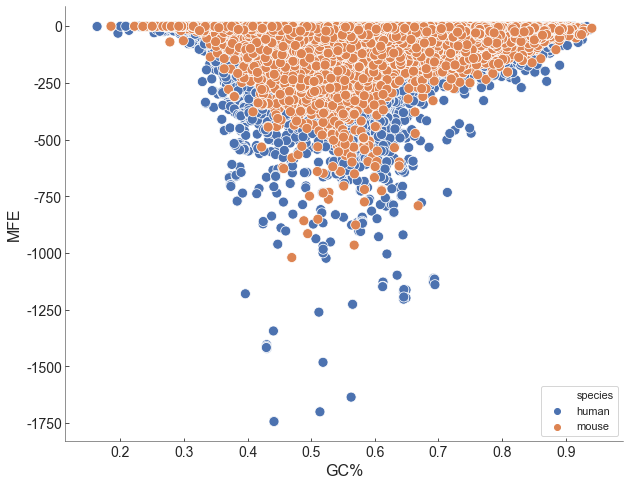

In [21]:
# 绘制GC%与seq_fold_energy的散点图，并根据seq_genus上色
# 替换 seq_genus 列的值为 human 和 mouse
utr5_df['seq_genus'] = utr5_df['seq_genus'].replace({'Homo': 'human', 'Mus': 'mouse'})
# 将 seq_genus 列名修改为 species
utr5_df['species'] = utr5_df['seq_genus']
# 去掉 MFE 低于 -2500 的数据
filtered_df = utr5_df[utr5_df['seq_fold_energy'] >= -2500]

plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(data=filtered_df, x='GC.', y='seq_fold_energy', hue='species', palette='deep', s=100)

# 设置图表标题和标签
# plt.title('Scatter Plot of GC% vs Sequence Fold Energy', fontsize=18)
plt.xlabel('GC%', fontsize=16)
plt.ylabel('MFE', fontsize=16)

# 设置x轴和y轴标签的字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 设置图例的字体大小
plt.legend(fontsize='11', loc='lower right')

# Set axis line width
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Hide right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot as a high-quality PNG image first
plt.savefig('result_1/scatterplot_GC_vs_energy.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_1/scatterplot_GC_vs_energy.png')
png_image.save('result_1/scatterplot_GC_vs_energy.tiff', dpi=(600, 600), compression='tiff_lzw')

# Show the plot
plt.show()



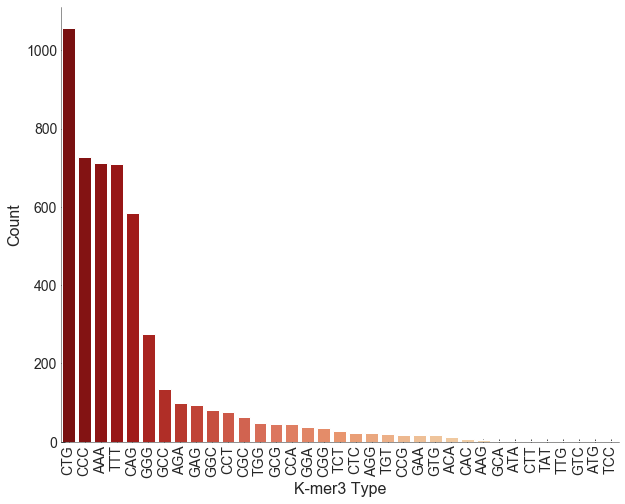

In [24]:
mfe_5utr_top5000 = utr5_df.sort_values(by="seq_fold_energy", ascending=True).head(5000)
mfe_5utr_top5000["seq_fold_energy"].head()
# print(mfe_5utr_top5000.iloc[1, :])
top_kmer3 = mfe_5utr_top5000['top_kmer3'].value_counts()
# 绘制条形图
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=top_kmer3.values, x=top_kmer3.index, palette="OrRd_r")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# 设置图表标题和标签
# plt.title('Bar Plot of Top 5 k-mer3 Sequences', fontsize=18)
plt.xlabel('K-mer3 Type', fontsize=16)
plt.ylabel('Count', fontsize=16)

# 设置x轴和y轴标签的字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set axis line width
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Hide right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Save the plot as a high-quality PNG image first
plt.savefig('result_1/barplot_top_kmer3.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_1/barplot_top_kmer3.png')
png_image.save('result_1/barplot_top_kmer3.tiff', dpi=(600, 600), compression='tiff_lzw')

# Show the plot
plt.show()
